# Final Decision Tree Models

In [43]:
from preprocessing import get_preprocessed_df
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier
import multiprocessing as mp
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [59]:
def get_results(holdout, model, chosen_features, y_test, y_pred):
    holdout_true = holdout[' loan_status']
    # holdout.drop(columns=[' loan_status'], inplace=True)
    holdout_pred = model.predict(holdout[chosen_features])
    val_acc = accuracy_score(y_test, y_pred)
    holdout_f1 = f1_score(holdout_true, holdout_pred)
    holdout_acc = accuracy_score(holdout_true, holdout_pred)
    cm = confusion_matrix(holdout_true, holdout_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
    disp.plot()
    return val_acc, holdout_f1, holdout_acc



# Vanilla Tree

In [45]:
def vanilla_tree():
    x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    holdout_true = holdout[' loan_status']
    holdout.drop(columns=[' loan_status'], inplace=True)
    holdout_pred = model.predict(holdout)
    
    print('------------------------------------ Without Cibil Score ------------------------------------')

    print("F1:", f1_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Holdout F1:", f1_score(holdout_true, holdout_pred))
    print("Holdout Accuracy:", accuracy_score(holdout_true, holdout_pred))

    x_train, x_test, y_train, y_test, holdout = get_preprocessed_df(with_cibil=True)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    holdout_true = holdout[' loan_status']
    holdout.drop(columns=[' loan_status'], inplace=True)
    holdout_pred = model.predict(holdout)

    print('------------------------------------ With Cibil Score ------------------------------------')
    print(f'holdout f1: {f1_score(holdout_true, holdout_pred)}')
    print(f'holdout acc: {accuracy_score(holdout_true, holdout_pred)}')


vanilla_tree()

------------------------------------ Without Cibil Score ------------------------------------
F1: 0.6447985004686035
Accuracy: 0.5562060889929742
Holdout F1: 0.6374045801526718
Holdout Accuracy: 0.5550351288056206
------------------------------------ With Cibil Score ------------------------------------
holdout f1: 0.998109640831758
holdout acc: 0.9976580796252927


# Decision Tree Classifier

In [46]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

number_of_features = 17
features = [' col_times_term',
     ' loan_term',
     ' lux_times_res',
     ' self_employed_ No',
     ' no_of_dependents_1',
     ' no_of_dependents_4',
     ' income_annum',
     ' loan_amount',
     ' self_employed_ Yes',
     ' education_ Graduate',
     ' no_of_dependents_2',
     ' term_times_income',
     ' residential_assets_value',
     ' loan_coll_ratio',
     ' loan_income_ratio',
     ' commercial_assets_value',
     ' bank_asset_value']



hyperparameters = {
    'max_depth': 27,
    'min_samples_split': 13,
    'min_samples_leaf': 5,
    'max_features': None,
    'criterion': 'log_loss',
    'random_state': 42,
    'class_weight': None,
    'splitter': 'best',
    'max_leaf_nodes': 52,
    'min_impurity_decrease': 0.0015640478078397374,
    'min_weight_fraction_leaf': 0.001673957360422289,
}

model = DecisionTreeClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)


print('------------------------------------ Without Cibil Score ------------------------------------')
print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')
print(f'val acc: {val_acc}')
print(f'holdout acc: {holdout_acc}')

x_train, x_test, y_train, y_test, holdout = get_preprocessed_df(with_cibil=True)
features.append(' cibil_score')
model = DecisionTreeClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)

print('------------------------------------ With Cibil Score ------------------------------------')
print(f'holdout f1: {holdout_f1}')
print(f'holdout acc: {holdout_acc}')

------------------------------------ Without Cibil Score ------------------------------------
val f1: 0.7728911319394377
holdout f1: 0.7663280116110306
val acc: 0.6311475409836066
holdout acc: 0.6229508196721312
------------------------------------ With Cibil Score ------------------------------------
holdout f1: 0.9981024667931689
holdout acc: 0.9976580796252927


# eXtreme Gradient Boosting Classifier

------------------------------------ Without Cibil Score ------------------------------------
val f1: 0.774800868935554
holdout f1: 0.7685589519650655
val acc: 0.6358313817330211
holdout acc: 0.6276346604215457
------------------------------------ With Cibil Score ------------------------------------
holdout f1: 0.9546351084812623
holdout acc: 0.9461358313817331


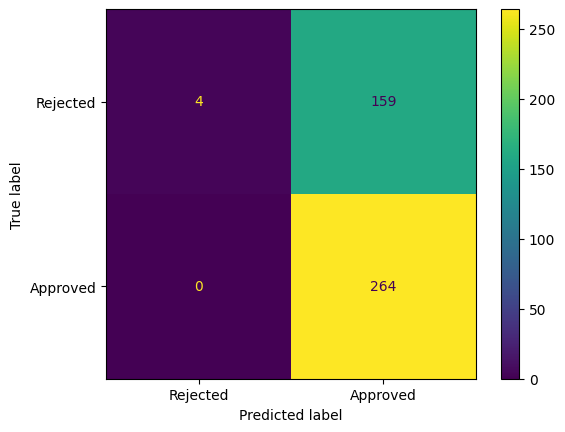

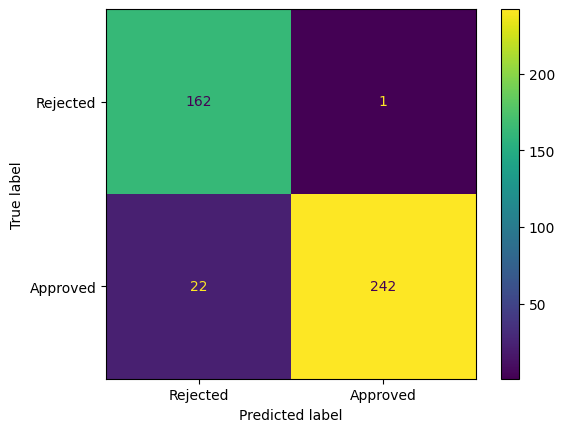

In [60]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

number_of_features = 6
features = [' no_of_dependents_4',
     ' no_of_dependents_0',
     ' loan_coll_ratio',
     ' loan_income_ratio',
     ' commercial_assets_value',
     ' bank_asset_value']



hyperparameters = {
    'max_depth': 4,
    'random_state': 42,
    'min_split_loss': 3,
    'min_child_weight': 14,
    'subsample': 0.868207131636942,
    'reg_lambda': 3,
    'reg_alpha': 2,
    'learning_rate': 0.04797473982907923
}

model = XGBClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)


print('------------------------------------ Without Cibil Score ------------------------------------')
print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')
print(f'val acc: {val_acc}')
print(f'holdout acc: {holdout_acc}')

x_train, x_test, y_train, y_test, holdout = get_preprocessed_df(with_cibil=True)
features.append(' cibil_score')
model = XGBClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)

print('------------------------------------ With Cibil Score ------------------------------------')
print(f'holdout f1: {holdout_f1}')
print(f'holdout acc: {holdout_acc}')

# Gaussian Naive Bayes

In [48]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

number_of_features = 17
features = [' no_of_dependents_2',
     ' loan_amount',
     ' self_employed_ No',
     ' income_annum',
     ' self_employed_ Yes',
     ' no_of_dependents_5',
     ' no_of_dependents_3',
     ' residential_assets_value',
     ' term_times_income',
     ' no_of_dependents_1',
     ' no_of_dependents_4',
     ' education_ Not Graduate',
     ' education_ Graduate',
     ' loan_coll_ratio',
     ' loan_income_ratio',
     ' commercial_assets_value',
     ' bank_asset_value']

model = GaussianNB()
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)


print('------------------------------------ Without Cibil Score ------------------------------------')
print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')
print(f'val acc: {val_acc}')
print(f'holdout acc: {holdout_acc}')

x_train, x_test, y_train, y_test, holdout = get_preprocessed_df(with_cibil=True)
features.append(' cibil_score')
model = GaussianNB()
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)

print('------------------------------------ With Cibil Score ------------------------------------')
print(f'holdout f1: {holdout_f1}')
print(f'holdout acc: {holdout_acc}')

------------------------------------ Without Cibil Score ------------------------------------
val f1: 0.7722342733188721
holdout f1: 0.760522496371553
val acc: 0.6311475409836066
holdout acc: 0.6135831381733021
------------------------------------ With Cibil Score ------------------------------------
holdout f1: 0.7616279069767442
holdout acc: 0.6159250585480094


# Random Forest Classifier

In [49]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

number_of_features = 18
features = [' total_collateral',
     ' col_times_term',
     ' education_ Not Graduate',
     ' no_of_dependents_0',
     ' education_ Graduate',
     ' no_of_dependents_4',
     ' term_times_income',
     ' no_of_dependents_5',
     ' lux_times_res',
     ' loan_amount',
     ' loan_term',
     ' no_of_dependents_1',
     ' self_employed_ Yes',
     ' self_employed_ No',
     ' loan_coll_ratio',
     ' loan_income_ratio',
     ' commercial_assets_value',
     ' bank_asset_value']



hyperparameters = {
    'max_depth': 26,
    'random_state': 42,
    'min_samples_split': 7,
    'min_samples_leaf': 5,
    'bootstrap': True,
    'warm_start': False,
    'min_weight_fraction_leaf': 0.02223794874814192,
    'n_estimators': 220,
    'criterion': 'entropy'
}

model = RandomForestClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)


print('------------------------------------ Without Cibil Score ------------------------------------')
print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')
print(f'val acc: {val_acc}')
print(f'holdout acc: {holdout_acc}')

x_train, x_test, y_train, y_test, holdout = get_preprocessed_df(with_cibil=True)
features.append(' cibil_score')
model = RandomForestClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)

print('------------------------------------ With Cibil Score ------------------------------------')
print(f'holdout f1: {holdout_f1}')
print(f'holdout acc: {holdout_acc}')

------------------------------------ Without Cibil Score ------------------------------------
val f1: 0.7760758570386579
holdout f1: 0.759124087591241
val acc: 0.6405152224824356
holdout acc: 0.6135831381733021
------------------------------------ With Cibil Score ------------------------------------
holdout f1: 0.998109640831758
holdout acc: 0.9976580796252927


# KNeighbors Classifier

In [50]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

number_of_features = 9
features = [' no_of_dependents_2',
     ' education_ Not Graduate',
     ' no_of_dependents_4',
     ' luxury_assets_value',
     ' no_of_dependents_5',
     ' loan_coll_ratio',
     ' loan_income_ratio',
     ' commercial_assets_value',
     ' bank_asset_value']



hyperparameters = {
    'weights': 'uniform',
    'n_neighbors': 31,
    'p': 2,
    'algorithm': 'auto'
}

model = KNeighborsClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)


print('------------------------------------ Without Cibil Score ------------------------------------')
print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')
print(f'val acc: {val_acc}')
print(f'holdout acc: {holdout_acc}')

x_train, x_test, y_train, y_test, holdout = get_preprocessed_df(with_cibil=True)
features.append(' cibil_score')
model = KNeighborsClassifier(**hyperparameters)
model.fit(x_train[features], y_train)
y_pred = model.predict(x_test[features])
f1 = f1_score(y_test, y_pred)
val_acc, holdout_f1, holdout_acc = get_results(holdout, model, features, y_test, y_pred)

print('------------------------------------ With Cibil Score ------------------------------------')
print(f'holdout f1: {holdout_f1}')
print(f'holdout acc: {holdout_acc}')

------------------------------------ Without Cibil Score ------------------------------------
val f1: 0.7636092468307233
holdout f1: 0.7473841554559043
val acc: 0.6288056206088993
holdout acc: 0.6042154566744731
------------------------------------ With Cibil Score ------------------------------------
holdout f1: 0.7485029940119761
holdout acc: 0.6065573770491803


# Model Outcomes Using GridSearch 

## Decision Tree Classifier

In [51]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

hyperparameters = {'criterion': 'entropy', 
    'max_depth': 4, 
    'max_leaf_nodes': 37, 
    'min_impurity_decrease': 0.006, 
    'min_samples_leaf': 2, 
    'min_samples_split': 8, 
    'min_weight_fraction_leaf': 0}

model = DecisionTreeClassifier(**hyperparameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')

val f1: 0.7712230215827338
holdout f1: 0.76410998552822


## XGradient Boosting Classifier

val f1: 0.7712230215827338
holdout f1: 0.76410998552822


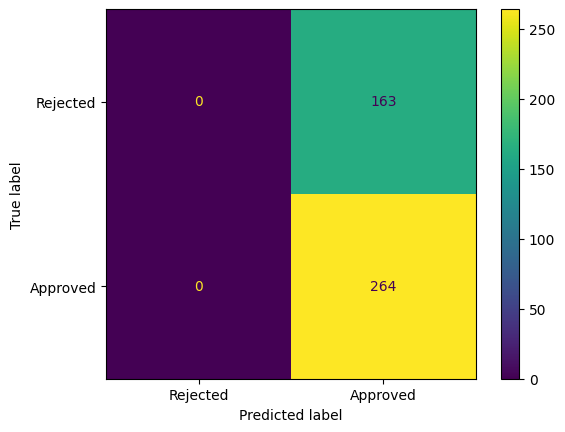

In [52]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

parameters = {'learning_rate': 0.001, 
    'max_depth': 4, 
    'min_child_weight': 3, 
    'min_split_loss': 6, 
    'reg_alpha': 2, 
    'reg_lambda': 3, 
    'random_state': 42,
    'subsample': 0.9}

xgb = XGBClassifier(**parameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')

## Gaussian NB

In [53]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

parameters = {'var_smoothing': 1.0}

model = GaussianNB(**parameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')

val f1: 0.7712230215827338
holdout f1: 0.76410998552822


## Random Forest

In [54]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

hyperparameters = {'bootstrap': False, 
    'criterion': 'log_loss', 
    'max_depth': 20, 
    'min_samples_leaf': 2, 
    'min_samples_split': 4, 
    'min_weight_fraction_leaf': 0.05, 
    'n_estimators': 250, 
    'warm_start': False}

model = RandomForestClassifier(**hyperparameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')




val f1: 0.7712230215827338
holdout f1: 0.76410998552822


## KNeighbors

In [55]:
x_train, x_test, y_train, y_test, holdout = get_preprocessed_df()

parameters = {'algorithm': 'auto', 
    'n_neighbors': 31, 
    'p': 2, 
    'weights': 'uniform'}

model = KNeighborsClassifier(**parameters)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
holdout_true = holdout[' loan_status']
holdout.drop(columns=[' loan_status'], inplace=True)
holdout_pred = model.predict(holdout)
holdout_f1 = f1_score(holdout_true, holdout_pred)

print(f'val f1: {f1}')
print(f'holdout f1: {holdout_f1}')

val f1: 0.7484939759036143
holdout f1: 0.7386018237082066
